In [7]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv("city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [14]:
# as we are only concerned about the relation between particle and gas concentration vs AQI we will drop the date column
# also as AQI_Bucket is directly derived from AQI we drop that too
data = data.drop(columns=["Date", "AQI_Bucket"])

In [15]:
data.max(axis=0)

City       Visakhapatnam
PM2.5             949.99
PM10              1000.0
NO                390.68
NO2               362.21
NOx               467.63
NH3               352.89
CO                175.81
SO2               193.86
O3                257.73
Benzene           455.03
Toluene           454.85
Xylene            170.37
AQI               2049.0
dtype: object

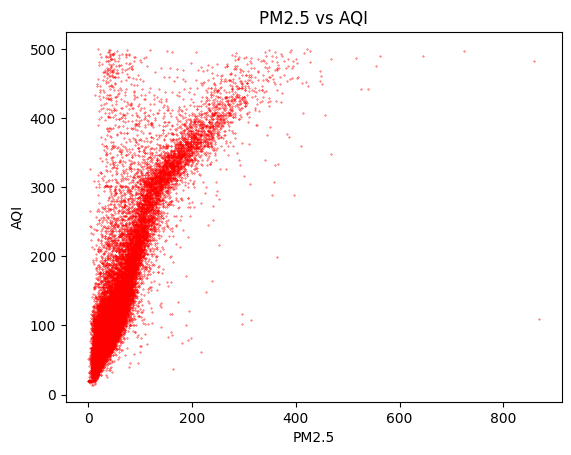

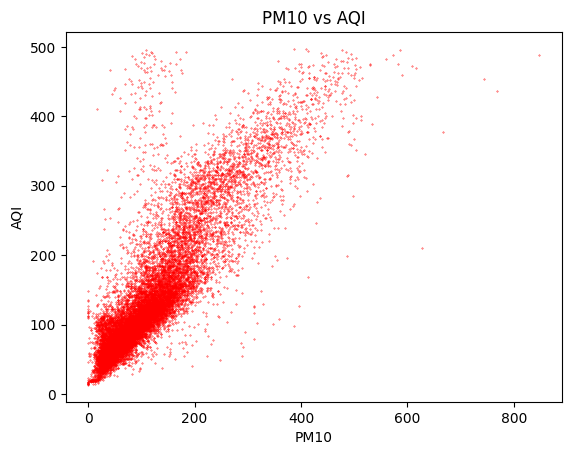

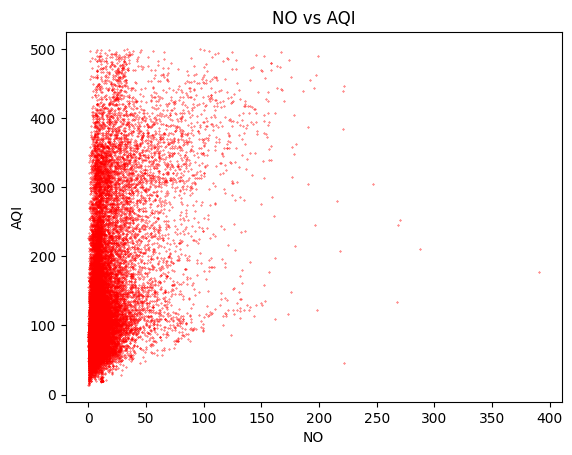

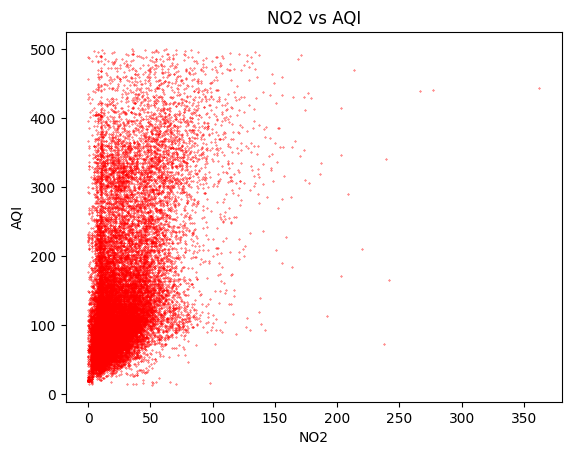

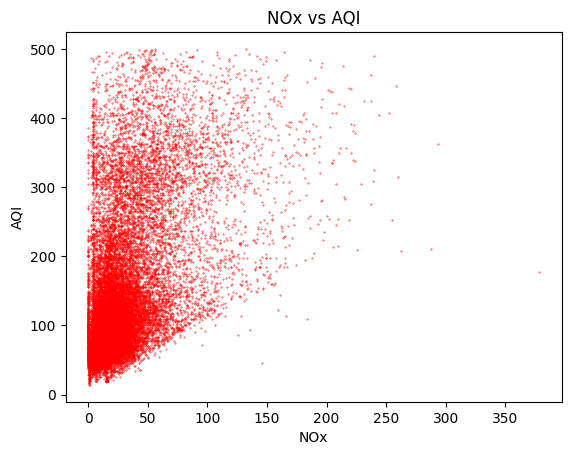

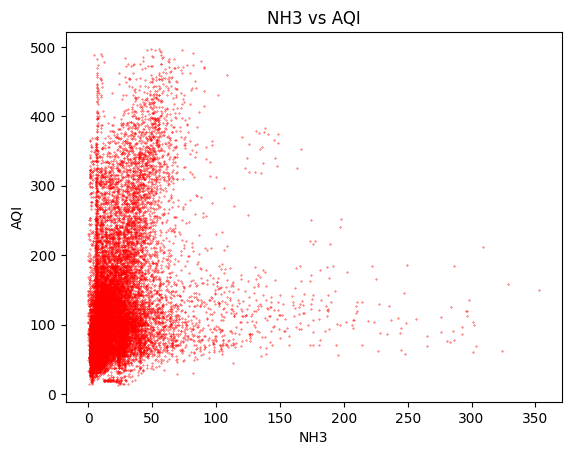

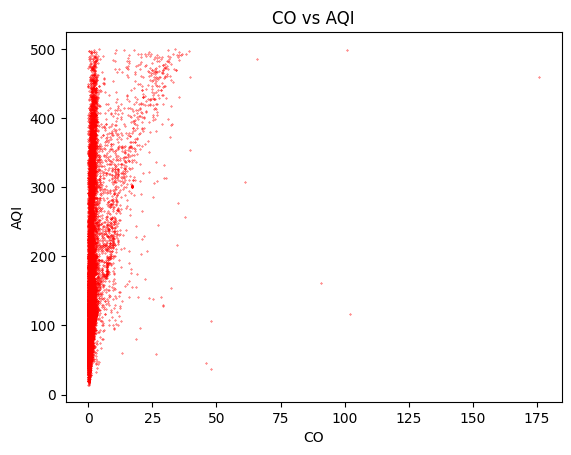

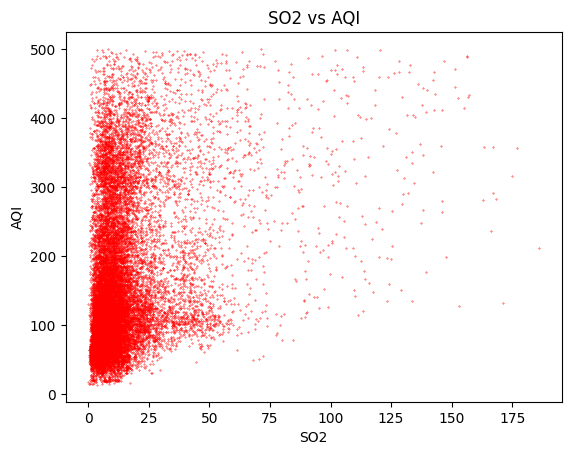

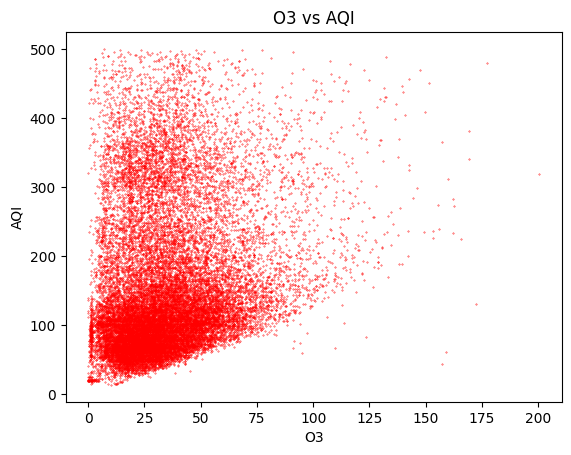

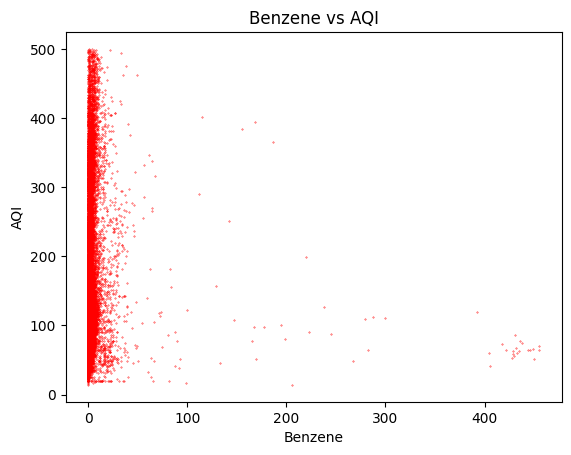

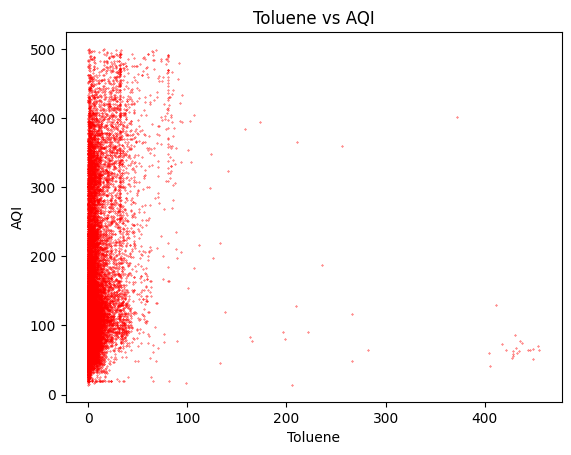

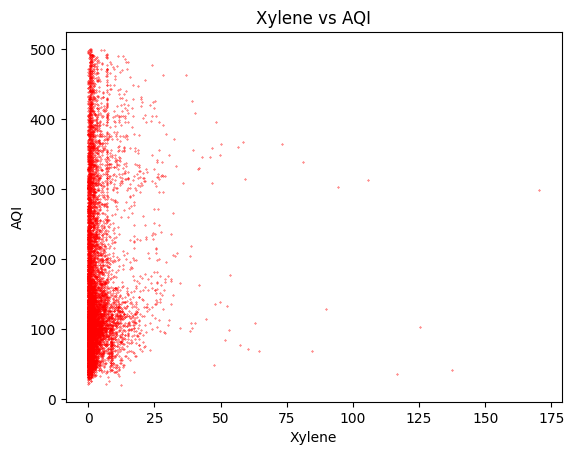

In [16]:
import matplotlib.pyplot as plt

data_scatter1 = data[data.AQI <= 500]

for feature in data.columns:
    if feature not in ["AQI", "City"]:
        plt.scatter(data_scatter1[feature], data_scatter1.AQI, color="red", s=0.1)
        plt.title(feature+" vs AQI")
        plt.xlabel(feature)
        plt.ylabel("AQI")
        plt.show()

In [17]:
# National Air Quality Index India doesn't monitor these pollutants to measure AQI, so we drop that too
data = data.drop(columns=["NO", "NOx", "Benzene", "Toluene", "Xylene"])
data

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,Ahmedabad,NaN,NaN,18.22,NaN,0.92,27.64,133.36,NaN
1,Ahmedabad,NaN,NaN,15.69,NaN,0.97,24.55,34.06,NaN
2,Ahmedabad,NaN,NaN,19.30,NaN,17.40,29.07,30.70,NaN
3,Ahmedabad,NaN,NaN,18.48,NaN,1.70,18.59,36.08,NaN
4,Ahmedabad,NaN,NaN,21.42,NaN,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,25.06,12.47,0.47,8.55,23.30,41.0
29527,Visakhapatnam,24.38,74.09,26.06,11.99,0.52,12.72,30.14,70.0
29528,Visakhapatnam,22.91,65.73,29.53,10.71,0.48,8.42,30.96,68.0
29529,Visakhapatnam,16.64,49.97,29.26,10.03,0.52,9.84,28.30,54.0


In [18]:
city_df = pd.DataFrame(np.zeros((26, 4)), index=data["City"].unique(), columns=["Value", "totalRows", "goodRows", "badRows"], dtype=int)
city_df["Value"] = range(1, 27)
city_df

,Value,totalRows,goodRows,badRows
Ahmedabad,1,0,0,0
Aizawl,2,0,0,0
Amaravati,3,0,0,0
Amritsar,4,0,0,0
Bengaluru,5,0,0,0
Bhopal,6,0,0,0
Brajrajnagar,7,0,0,0
Chandigarh,8,0,0,0
Chennai,9,0,0,0
Coimbatore,10,0,0,0


In [19]:
data.isna().sum()

City         0
PM2.5     4598
PM10     11140
NO2       3585
NH3      10328
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [20]:
data.cov()

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
PM2.5,4181.103046,3964.876578,564.256869,380.967524,41.597359,145.216476,227.057983,5891.417048
PM10,3964.876578,8209.285907,961.792631,592.761375,36.920023,350.743937,485.719266,7441.267887
NO2,564.256869,961.792631,599.013182,122.994559,63.017266,173.040119,154.609851,1869.460439
NH3,380.967524,592.761375,122.994559,659.681982,4.698292,-11.016645,52.096007,602.976389
CO,41.597359,36.920023,63.017266,4.698292,48.481757,62.846116,6.348900,681.401481
SO2,145.216476,350.743937,173.040119,-11.016645,62.846116,328.833790,63.175077,1203.601529
O3,227.057983,485.719266,154.609851,52.096007,6.348900,63.175077,470.669909,602.650818
AQI,5891.417048,7441.267887,1869.460439,602.976389,681.401481,1203.601529,602.650818,19795.529057


<h4>Removing Null Values</h4>

In [21]:
df = data.copy()

In [22]:
threshhold = 4

for i in df.index:
    city_df.loc[df.loc[i, "City"], "totalRows"] += 1

    if df.loc[i].isna().sum() >= threshhold:
        city_df.loc[df.loc[i, "City"], "badRows"] += 1
        df.drop(i, inplace=True)
    else:   
        city_df.loc[df.loc[i, "City"], "goodRows"] += 1 
        df.loc[i, "City"] = city_df.loc[df.loc[i, "City"], "Value"]

df["City"] = df["City"].astype(int)
city_df

,Value,totalRows,goodRows,badRows
Ahmedabad,1,2009,1372,637
Aizawl,2,113,113,0
Amaravati,3,951,896,55
Amritsar,4,1221,1177,44
Bengaluru,5,2009,1995,14
Bhopal,6,289,280,9
Brajrajnagar,7,938,745,193
Chandigarh,8,304,304,0
Chennai,9,2009,1972,37
Coimbatore,10,386,381,5


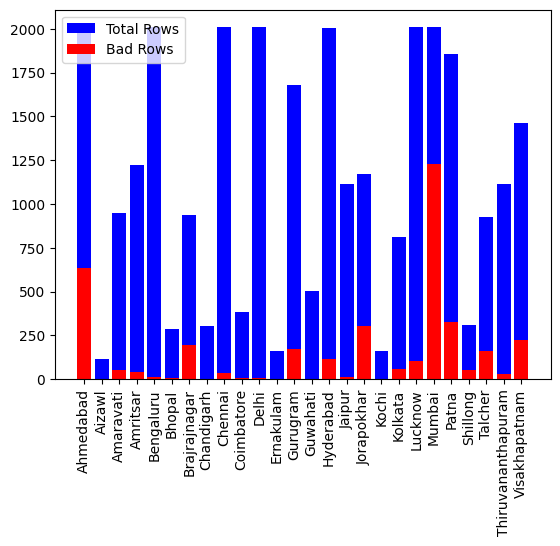

In [23]:
import matplotlib.pyplot as plt

plt.bar(city_df.index, city_df.totalRows, color="blue", label="Total Rows")
plt.bar(city_df.index, city_df.badRows, color="red", label="Bad Rows")
plt.xticks(rotation="90")
plt.legend()

plt.show()

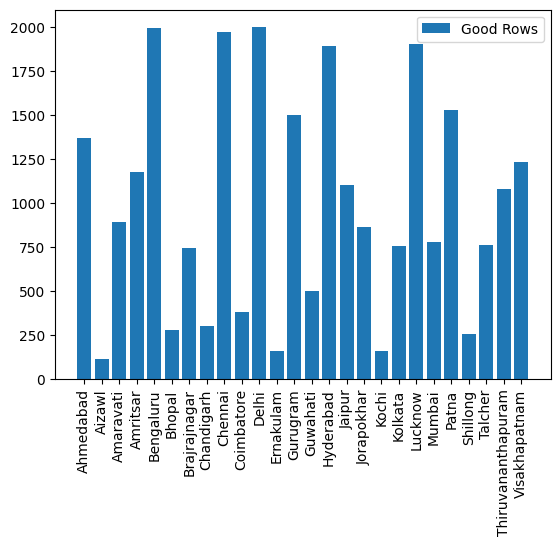

In [24]:
plt.bar(city_df.index, city_df.goodRows, label="Good Rows")
plt.xticks(rotation="90")
plt.legend()

plt.show()

In [25]:
remove_cities = [2, 12, 18]

for i in df.index:
    if df.loc[i, "City"] in remove_cities:
        df.drop(i, inplace=True)

df["City"].unique()

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23, 24, 25, 26])

In [26]:
df.index = range(len(df.index))
df

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,1,73.24,NaN,21.11,NaN,5.72,36.52,62.42,NaN
1,1,83.13,NaN,28.71,NaN,6.93,49.52,59.76,209.0
2,1,79.84,NaN,28.68,NaN,13.85,48.49,97.07,328.0
3,1,94.52,NaN,32.66,NaN,24.39,67.39,111.33,514.0
4,1,135.99,NaN,42.08,NaN,43.48,75.23,102.70,782.0
...,...,...,...,...,...,...,...,...,...
25301,26,15.02,50.94,25.06,12.47,0.47,8.55,23.30,41.0
25302,26,24.38,74.09,26.06,11.99,0.52,12.72,30.14,70.0
25303,26,22.91,65.73,29.53,10.71,0.48,8.42,30.96,68.0
25304,26,16.64,49.97,29.26,10.03,0.52,9.84,28.30,54.0


In [27]:
df.isna().sum()

City        0
PM2.5     900
PM10     7439
NO2       255
NH3      6671
CO        419
SO2       523
O3        567
AQI       988
dtype: int64

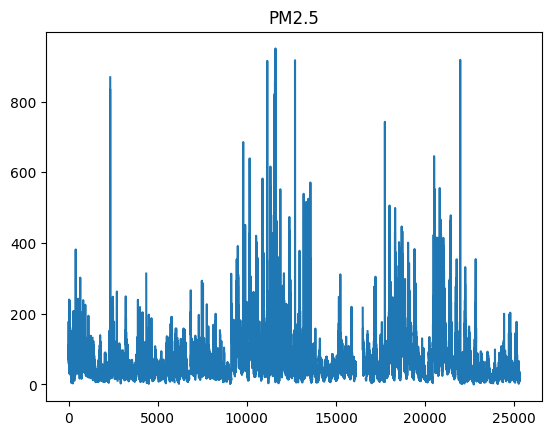

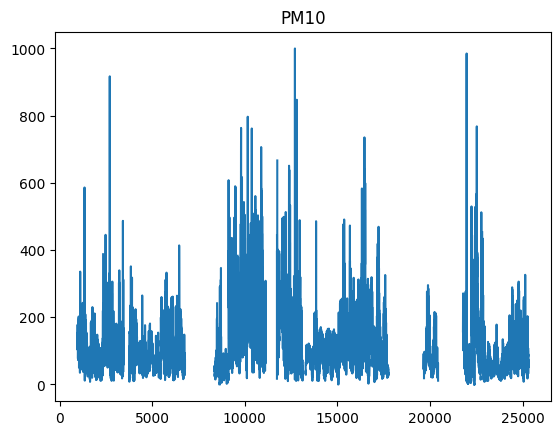

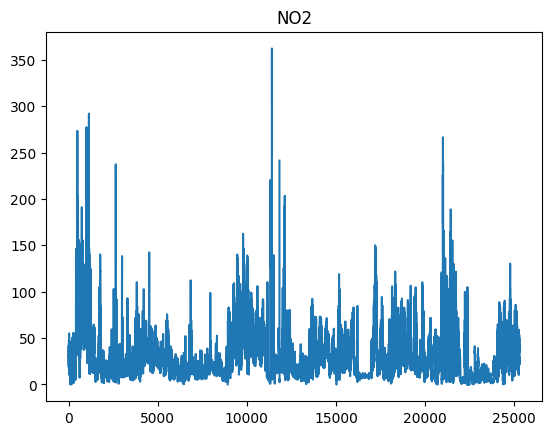

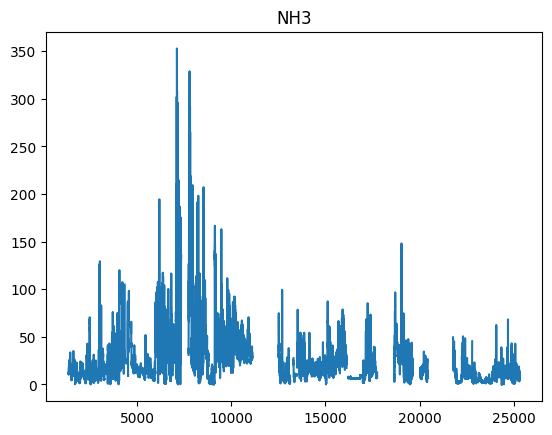

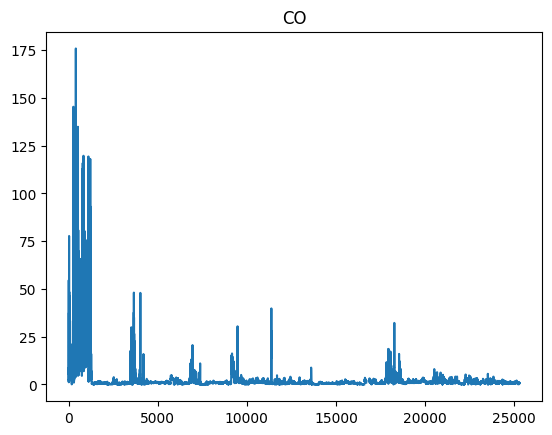

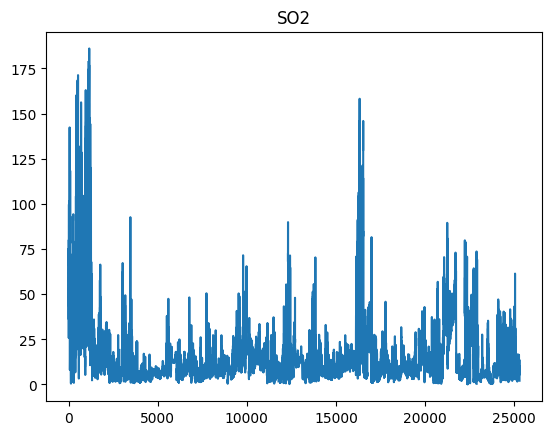

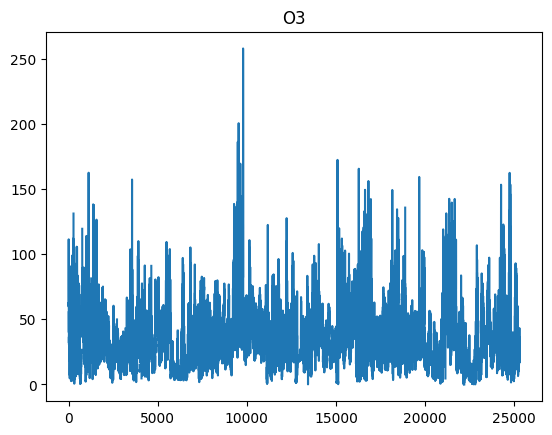

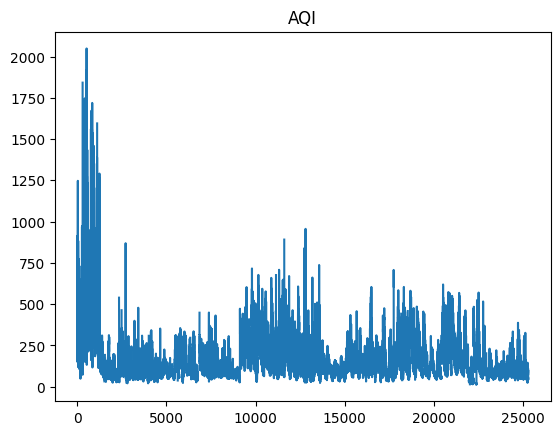

In [28]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column != "City":
        plt.plot(range(1, len(df[column])+1), df[column])
        plt.title(column)
        plt.show()

<h4>Mean Imputation</h4>

In [29]:
df_im = df.copy()

for i in df_im["City"].unique():

    for column in df_im.columns:
        if column not in ["City", "PM10", "NH3"]:
            mean = np.mean(df_im.loc[df_im["City"] == i, column])
            df_im.loc[df_im["City"] == i, column] = df_im.loc[df_im["City"] == i, column].fillna(mean)

df_im.isna().sum()


City        0
PM2.5       0
PM10     7439
NO2         0
NH3      6671
CO          0
SO2         0
O3          0
AQI         0
dtype: int64

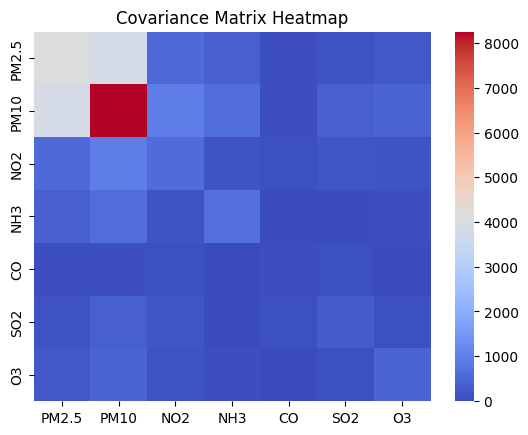

,PM2.5,PM10,NO2,NH3,CO,SO2,O3
PM2.5,4076.453903,3853.217145,539.372433,368.053179,38.995944,134.673965,207.276346
PM10,3853.217145,8256.461459,929.073575,603.783847,36.127235,352.789016,456.360692
NO2,539.372433,929.073575,601.041864,121.667398,63.353206,171.769540,148.354970
NH3,368.053179,603.783847,121.667398,670.090857,4.854044,-11.856446,49.573638
CO,38.995944,36.127235,63.353206,4.854044,50.021506,60.449114,6.249923
SO2,134.673965,352.789016,171.769540,-11.856446,60.449114,310.657864,64.004430
O3,207.276346,456.360692,148.354970,49.573638,6.249923,64.004430,457.666066


In [30]:
import seaborn as sb

sb.heatmap(df_im.drop(columns=["City", "AQI"]).cov(), cmap="coolwarm")
plt.title("Covariance Matrix Heatmap")
plt.show()
df_im.drop(columns=["City", "AQI"]).cov()

<h4>Regression Imputation</h4>

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

data_pm10 = df_im[df_im["PM10"].notnull()].drop(columns=["City", "NH3", "AQI"])
print(data_pm10)
print(data_pm10.max(axis=0))


       PM2.5    PM10     NO2     CO     SO2     O3
958    46.04  141.54  130.23  17.26  107.28  48.32
959    37.55  122.41   85.12  15.08  163.01  48.23
960    33.97  116.32   79.71  14.67   91.26  51.86
961    35.48  130.07   77.61  18.02   98.35  38.99
962    34.11  138.31   75.23  13.27   88.66  42.22
...      ...     ...     ...    ...     ...    ...
25301  15.02   50.94   25.06   0.47    8.55  23.30
25302  24.38   74.09   26.06   0.52   12.72  30.14
25303  22.91   65.73   29.53   0.48    8.42  30.96
25304  16.64   49.97   29.26   0.52    9.84  28.30
25305  15.00   66.00   26.85   0.59    2.10  17.05

[17867 rows x 6 columns]
PM2.5     917.77
PM10     1000.00
NO2       292.02
CO        119.30
SO2       186.08
O3        257.73
dtype: float64


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xpm10 = pd.DataFrame(data=scaler.fit_transform(data_pm10.drop(columns=["PM10"])), columns=data_pm10.drop(columns=["PM10"]).columns)
print(xpm10)

xtrainpm10, xtestpm10, ytrainpm10, ytestpm10 = train_test_split(xpm10, data_pm10["PM10"], train_size=0.7)

          PM2.5       NO2        CO       SO2        O3
0      0.050124  0.445944  0.144677  0.576503  0.187451
1      0.040873  0.291463  0.126404  0.876014  0.187102
2      0.036972  0.272936  0.122967  0.490407  0.201187
3      0.038617  0.265744  0.151048  0.528511  0.151249
4      0.037124  0.257594  0.111232  0.476434  0.163782
...         ...       ...       ...       ...       ...
17862  0.016323  0.085785  0.003940  0.045897  0.090369
17863  0.026522  0.089209  0.004359  0.068308  0.116910
17864  0.024920  0.101092  0.004023  0.045198  0.120092
17865  0.018088  0.100168  0.004359  0.052830  0.109770
17866  0.016301  0.091915  0.004946  0.011232  0.066118

[17867 rows x 5 columns]


In [33]:
model_pm10 = RandomForestRegressor()
model_pm10.fit(xtrainpm10, ytrainpm10)

RandomForestRegressor()

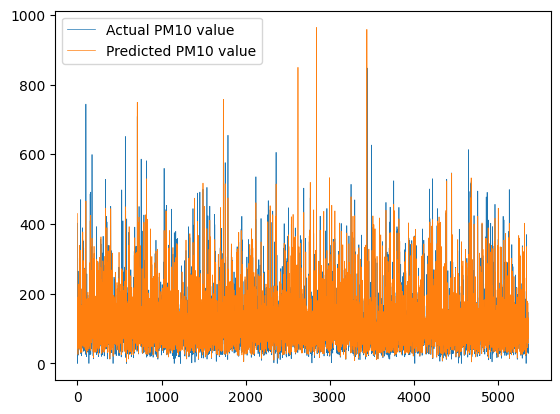

Mean squared error:  2056.3220193006196
Mean absolute error:  25.332946278679355
r2_score:  0.7495026022931395


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_pm10 = model_pm10.predict(xtestpm10)

plt.plot(range(len(xtestpm10)), ytestpm10, label="Actual PM10 value", linewidth=0.5)
plt.plot(range(len(xtestpm10)), pred_pm10, label="Predicted PM10 value", linewidth=0.5)
plt.legend()
plt.show()

print("Mean squared error: ", mean_squared_error(ytestpm10, pred_pm10))
print("Mean absolute error: ", mean_absolute_error(ytestpm10, pred_pm10))
print("r2_score: ", r2_score(ytestpm10, pred_pm10))

In [35]:
data_nh3 = df_im[df_im["NH3"].notnull()].drop(columns=["City", "PM10", "AQI"])
print(data_nh3)


       PM2.5    NO2    NH3    CO    SO2      O3
1372   71.36  20.65  12.19  0.10  10.76  109.26
1373   81.40  20.50  10.72  0.12  15.24  127.09
1374   78.32  26.00  10.28  0.14  26.96  117.44
1375   88.76  30.85  12.91  0.11  33.59  111.81
1376   64.18  28.07  11.42  0.09  19.00  138.18
...      ...    ...    ...   ...    ...     ...
25301  15.02  25.06  12.47  0.47   8.55   23.30
25302  24.38  26.06  11.99  0.52  12.72   30.14
25303  22.91  29.53  10.71  0.48   8.42   30.96
25304  16.64  29.26  10.03  0.52   9.84   28.30
25305  15.00  26.85   5.20  0.59   2.10   17.05

[18635 rows x 6 columns]


In [36]:
xnh3 = pd.DataFrame(data=scaler.fit_transform(data_nh3.drop(columns=["NH3"])), columns=data_nh3.drop(columns=["NH3"]).columns)
print(xnh3)
xtrainnh3, xtestnh3, ytrainnh3, ytestnh3 = train_test_split(xnh3, data_nh3["NH3"], train_size=0.7)

          PM2.5       NO2        CO       SO2        O3
0      0.075740  0.086993  0.002080  0.067935  0.423910
1      0.086703  0.086361  0.002496  0.096246  0.493093
2      0.083340  0.109542  0.002912  0.170311  0.455650
3      0.094740  0.129984  0.002288  0.212209  0.433804
4      0.067899  0.118267  0.001872  0.120008  0.536124
...         ...       ...       ...       ...       ...
18630  0.014218  0.105580  0.009777  0.053969  0.090369
18631  0.024438  0.109795  0.010818  0.080321  0.116910
18632  0.022833  0.124420  0.009985  0.053147  0.120092
18633  0.015987  0.123282  0.010818  0.062121  0.109770
18634  0.014196  0.113125  0.012274  0.013208  0.066118

[18635 rows x 5 columns]


In [37]:
model_nh3 = RandomForestRegressor()
model_nh3.fit(xtrainnh3, ytrainnh3)

RandomForestRegressor()

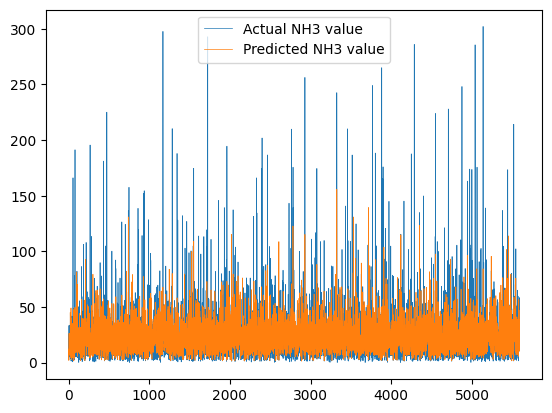

Mean squared error:  496.8230133960401
Mean absolute error:  12.058897048828474
r2_score:  0.27894712593899484


In [58]:
pred_nh3 = model_nh3.predict(xtestnh3)

plt.plot(range(len(xtestnh3)), ytestnh3, label="Actual NH3 value", linewidth=0.5)
plt.plot(range(len(xtestnh3)), pred_nh3, label="Predicted NH3 value", linewidth=0.5)
plt.legend()
plt.show()

print("Mean squared error: ", mean_squared_error(ytestnh3, pred_nh3))
print("Mean absolute error: ", mean_absolute_error(ytestnh3, pred_nh3))
print("r2_score: ", r2_score(ytestnh3, pred_nh3))

In [38]:
df_im.loc[df_im["PM10"].isna(), "PM10"] = model_pm10.predict(df_im[df_im["PM10"].isna()].drop(columns=["City", "PM10", "NH3", "AQI"]))
df_im.loc[df_im["NH3"].isna(), "NH3"] = model_nh3.predict(df_im[df_im["NH3"].isna()].drop(columns=["City", "PM10", "NH3", "AQI"]))

df_im.isna().sum()

City     0
PM2.5    0
PM10     0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [39]:
df_im.max(axis=0)

City       26.00
PM2.5     949.99
PM10     1000.00
NO2       362.21
NH3       352.89
CO        175.81
SO2       186.08
O3        257.73
AQI      2049.00
dtype: float64

<h4>Normalizing the dataset</h4>

In [40]:
X, Y = df_im.drop(columns=["AQI"]), df_im["AQI"]

X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)
X

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3
0,0.0,0.077057,0.835030,0.058255,0.307884,0.032535,0.196216,0.242162
1,0.0,0.087468,0.835030,0.079238,0.307884,0.039418,0.266083,0.231841
2,0.0,0.084004,0.835030,0.079155,0.307884,0.078778,0.260547,0.376610
3,0.0,0.099458,0.835030,0.090144,0.307884,0.138729,0.362122,0.431942
4,0.0,0.143113,0.835030,0.116151,0.307884,0.247312,0.404256,0.398456
...,...,...,...,...,...,...,...,...
25301,1.0,0.015769,0.050931,0.069161,0.035282,0.002673,0.045897,0.090369
25302,1.0,0.025622,0.074081,0.071922,0.033922,0.002958,0.068308,0.116910
25303,1.0,0.024075,0.065721,0.081502,0.030294,0.002730,0.045198,0.120092
25304,1.0,0.017475,0.049960,0.080756,0.028367,0.002958,0.052830,0.109770


In [41]:

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7)

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

<h2>Random Forest Regression</h2>

In [70]:

rf_params_random = {"n_estimators":[400, 500, 600, 700, 1000, 2000], "max_features":["auto", "sqrt", 0.4], "bootstrap":[True, False], "min_samples_leaf": [1, 2, 4], "min_samples_split": [2, 5, 10]}

In [68]:
rs_rf = RandomizedSearchCV(RandomForestRegressor(), rf_params_random, n_iter=10, scoring="neg_mean_squared_error")
rs_rf.fit(xtrain, ytrain)
rs_rf.best_params_

c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.4,
 'bootstrap': True}

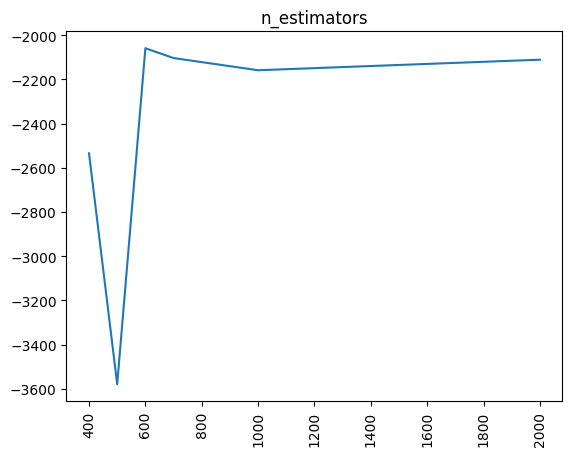

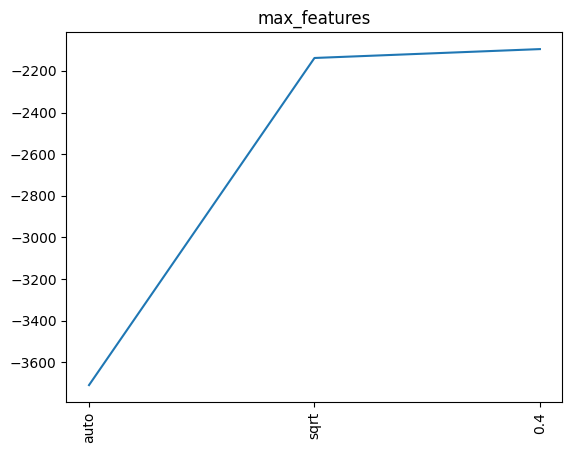

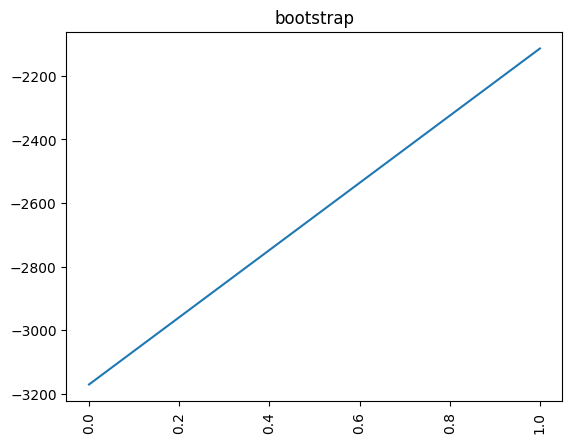

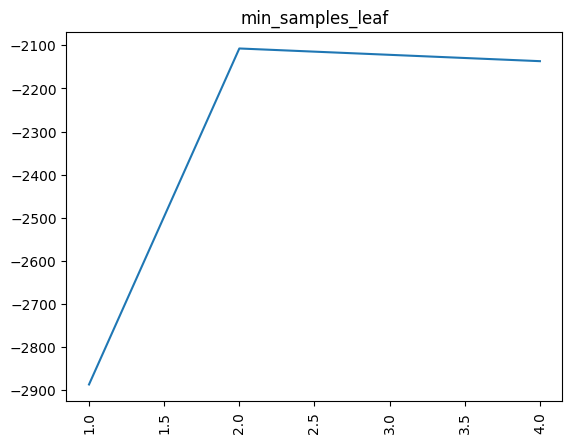

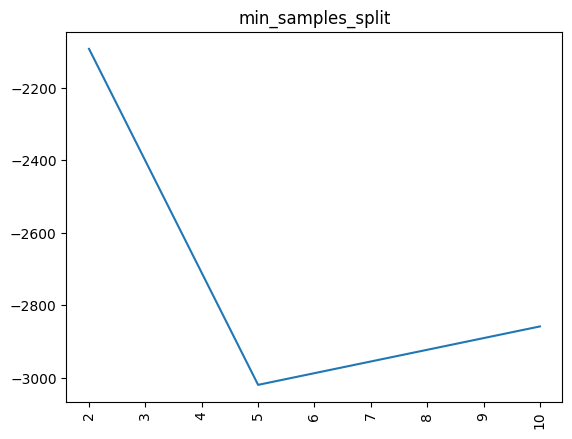

In [69]:
param_vs_score1 = rs_rf.cv_results_["params"]
ind = 0

for val in rs_rf.cv_results_["mean_test_score"]:

    param_vs_score1[ind]["Value"] = val
    ind += 1


for param in rf_params_random:
    xval = []
    yval = []

    plt.title(param)
    plt.xticks(rotation="90")

    for param_value in rf_params_random[param]:
            
            xlist = []
        
            for element in param_vs_score1:
                 
                 if element[param] == param_value:
                      xlist.append(element["Value"])

            if len(xlist) != 0:
                 xval.append(param_value)
                 yval.append(np.average(xlist))

    plt.plot(xval, yval)
    plt.show()

In [71]:
rf_params_grid = {"n_estimators":[600, 1000, 2000], "max_features":[0.4], "bootstrap":[True], "min_samples_leaf": [2, 4], "min_samples_split": [2]}
gs_rf = GridSearchCV(RandomForestRegressor(), rf_params_grid, scoring="neg_mean_squared_error")
gs_rf.fit(xtrain, ytrain)
gs_rf.best_params_

{'bootstrap': True,
 'max_features': 0.4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

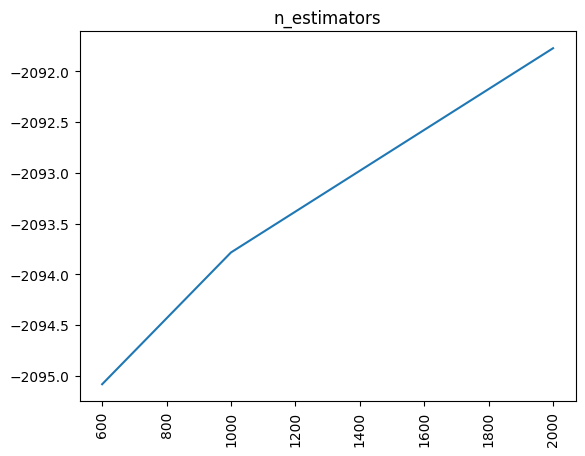

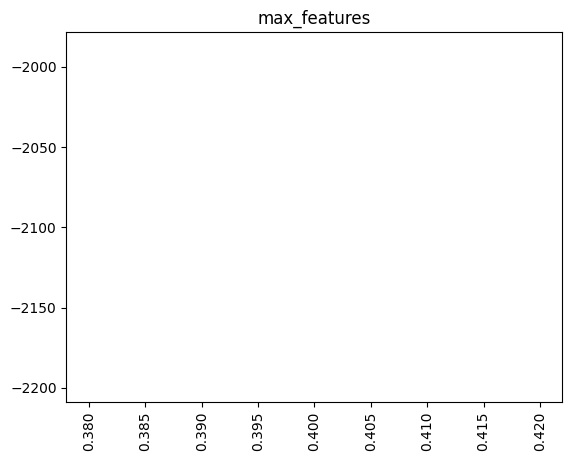

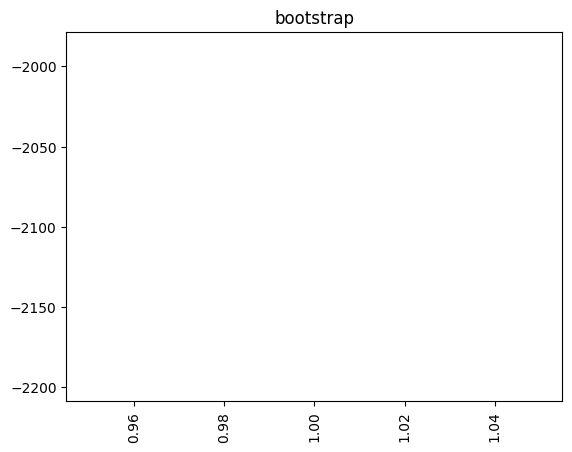

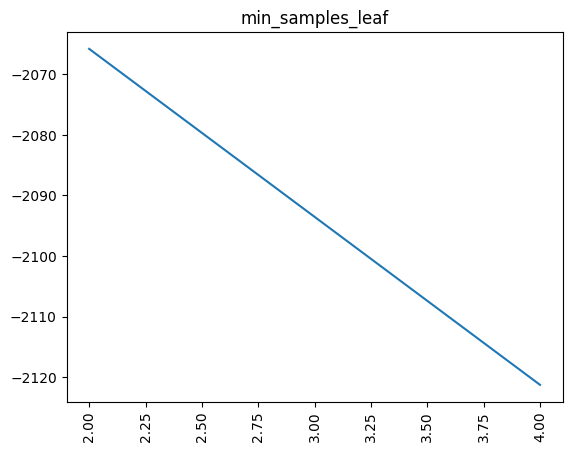

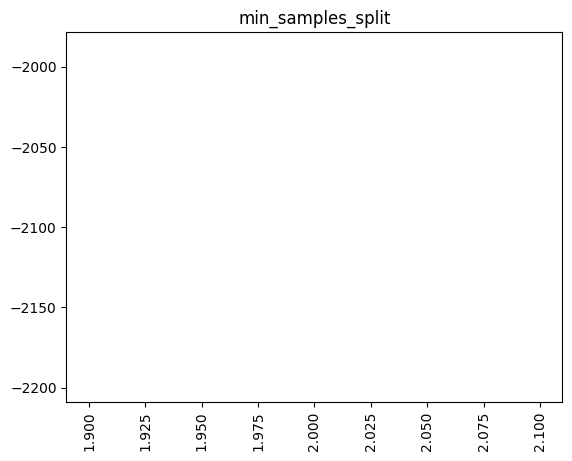

In [72]:
param_vs_score12 = gs_rf.cv_results_["params"]
ind = 0

for val in gs_rf.cv_results_["mean_test_score"]:

    param_vs_score12[ind]["Value"] = val
    ind += 1


for param in rf_params_grid:
    xval = []
    yval = []

    plt.title(param)
    plt.xticks(rotation="90")

    for param_value in rf_params_grid[param]:
            
            xlist = []
        
            for element in param_vs_score12:
                 
                 if element[param] == param_value:
                      xlist.append(element["Value"])

            if len(xlist) != 0:
                 xval.append(param_value)
                 yval.append(np.average(xlist))

    plt.plot(xval, yval)
    plt.show()

In [73]:
model1 = RandomForestRegressor(n_estimators=2000, max_features=0.4, bootstrap=True, min_samples_leaf=2, min_samples_split=2)
model1.fit(xtrain, ytrain)

RandomForestRegressor(max_features=0.4, min_samples_leaf=2, n_estimators=2000)

In [74]:
pred1 = model1.predict(xtest)
pred1_train = model1.predict(xtrain)
print("Model 1 - Random Forest Regressor\n")
print("Training Data\n")
print("Mean Squared Error: ", mean_squared_error(ytrain, pred1_train))
print("Mean Absolute Error: ", mean_absolute_error(ytrain, pred1_train))
print("r2_score: ", r2_score(ytrain, pred1_train))
print("\nTestin Data\n")
print("Mean Squared Error: ", mean_squared_error(ytest, pred1))
print("Mean Absolute Error: ", mean_absolute_error(ytest, pred1))
print("r2_score: ", r2_score(ytest, pred1))

Model 1 - Random Forest Regressor

Training Data

Mean Squared Error:  612.2696835775791
Mean Absolute Error:  11.295207052617554
r2_score:  0.9675867289403032

Testin Data

Mean Squared Error:  2089.802240792458
Mean Absolute Error:  22.576251288008244
r2_score:  0.9007988122723236


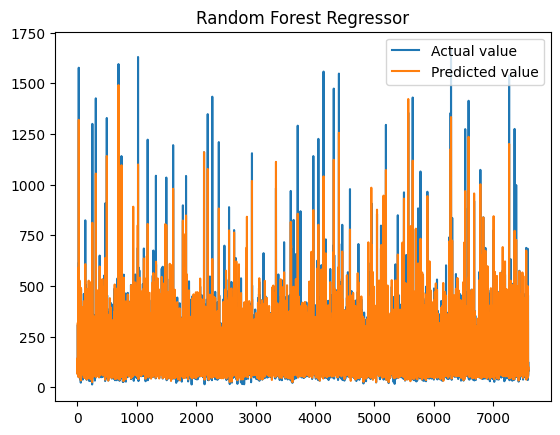

In [75]:
plt.plot(range(len(xtest)), ytest, label="Actual value")
plt.plot(range(len(xtest)), pred1, label="Predicted value")
plt.title("Random Forest Regressor")
plt.legend()
plt.show()

<h2>Polynomial Regression</h2>

In [46]:
pr_params = {"poly__degree": [2, 3, 4, 5]}

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model2 = Pipeline([("poly", PolynomialFeatures()), ("linear", LinearRegression())])

In [52]:
gs_poly = GridSearchCV(model2, pr_params, scoring="neg_mean_squared_error")
gs_poly.fit(xtrain, ytrain)
gs_poly.best_params_

{'poly__degree': 3}

In [56]:
model2["poly"].degree = 3
model2.fit(xtrain, ytrain)

pred2 = model2.predict(xtest)
pred2_train = model2.predict(xtrain)

print("Model 2 - Polynomial Regression\n")
print("Training Data\n")
print("Mean Squared Error: ", mean_squared_error(ytrain, pred2_train))
print("Mean Absolute Error: ", mean_absolute_error(ytrain, pred2_train))
print("r2_score: ", r2_score(ytrain, pred2_train))
print("\nTestin Data\n")
print("Mean Squared Error: ", mean_squared_error(ytest, pred2))
print("Mean Absolute Error: ", mean_absolute_error(ytest, pred2))
print("r2_score: ", r2_score(ytest, pred2))

Model 2 - Polynomial Regression

Training Data

Mean Squared Error:  2074.1975804932686
Mean Absolute Error:  26.42173131504937
r2_score:  0.8901929489386897

Testin Data

Mean Squared Error:  2624.8062558466554
Mean Absolute Error:  27.958715938342763
r2_score:  0.8754026131983258


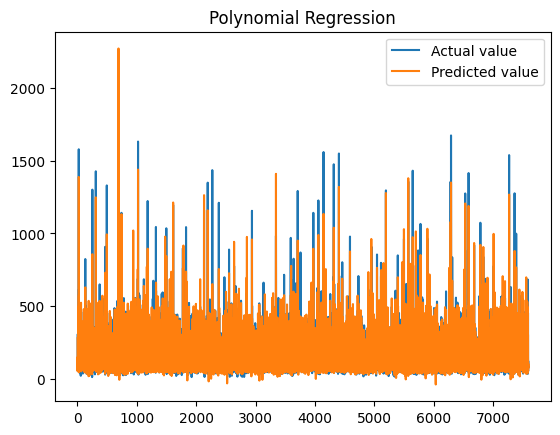

In [58]:
plt.plot(range(len(xtest)), ytest, label="Actual value")
plt.plot(range(len(xtest)), pred2, label="Predicted value")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

<h2>Support Vector Regression</h2>

In [60]:
svr_params_random = {"kernel":["linear", "rbf", "poly"], "degree":[2, 3], "C":[0.1, 1, 10, 100], "gamma":[0.01, 0.1, 1, 10]}

In [61]:
from sklearn.svm import SVR

rs_svr = RandomizedSearchCV(SVR(), svr_params_random, n_iter=10, scoring="neg_mean_squared_error")
rs_svr.fit(xtrain, ytrain)
rs_svr.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 100}

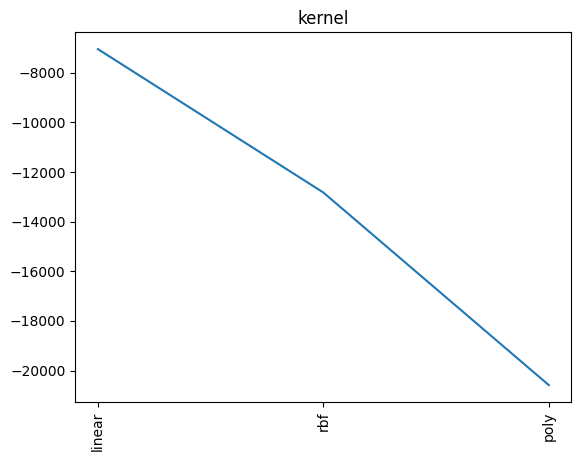

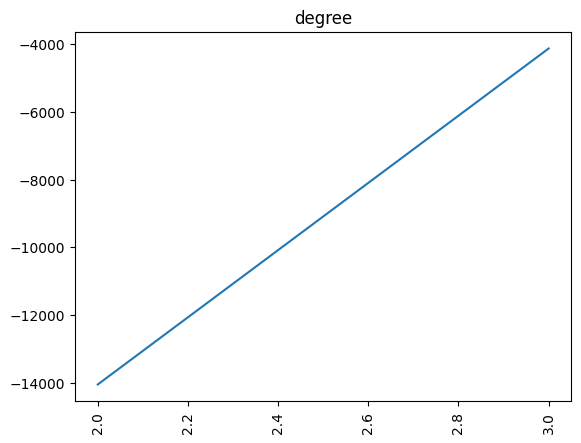

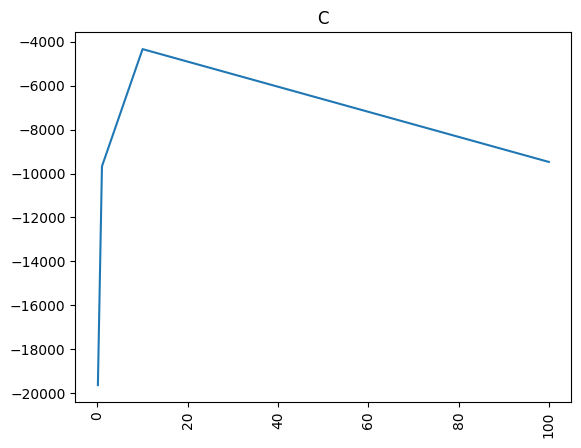

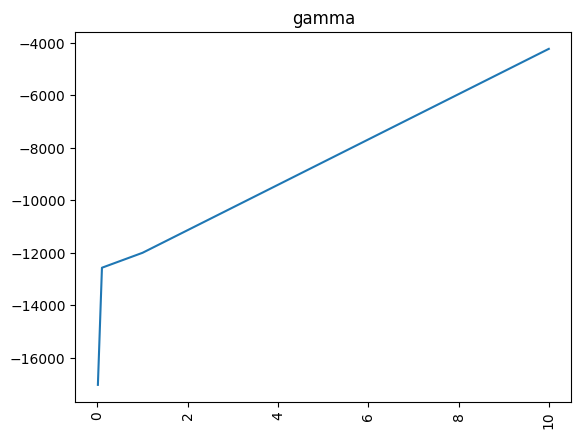

In [62]:
param_vs_score3 = rs_svr.cv_results_["params"]
ind = 0

for val in rs_svr.cv_results_["mean_test_score"]:

    param_vs_score3[ind]["Value"] = val
    ind += 1


for param in svr_params_random:
    xval = []
    yval = []

    plt.title(param)
    plt.xticks(rotation="90")

    for param_value in svr_params_random[param]:
            
            xlist = []
        
            for element in param_vs_score3:
                 
                 if element[param] == param_value:
                      xlist.append(element["Value"])

            if len(xlist) != 0:
                 xval.append(param_value)
                 yval.append(np.average(xlist))

    plt.plot(xval, yval)
    plt.show()

In [63]:
svr_params_grid = {"kernel":["linear", "rbf"], "degree":[3, 4], "C":[10, 100], "gamma":[0.01, 0.1]}

In [64]:

gs_svr = GridSearchCV(SVR(), svr_params_grid, scoring="neg_mean_squared_error")
gs_svr.fit(xtrain, ytrain)
gs_svr.best_params_

{'C': 100, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [65]:
model3 = SVR(kernel="rbf", degree=3, C=100, gamma=0.1)
model3.fit(xtrain, ytrain)

pred3 = model3.predict(xtest)
pred3_train = model3.predict(xtrain)

print("Model 3 - Support Vector Regression\n")
print("Training Data\n")
print("Mean Squared Error: ", mean_squared_error(ytrain, pred3_train))
print("Mean Absolute Error: ", mean_absolute_error(ytrain, pred3_train))
print("r2_score: ", r2_score(ytrain, pred3_train))
print("\nTestin Data\n")
print("Mean Squared Error: ", mean_squared_error(ytest, pred3))
print("Mean Absolute Error: ", mean_absolute_error(ytest, pred3))
print("r2_score: ", r2_score(ytest, pred3))

Model 3 - Support Vector Regression

Training Data

Mean Squared Error:  3740.479248646001
Mean Absolute Error:  31.833809685438098
r2_score:  0.8019807757406764

Testin Data

Mean Squared Error:  3862.0514945586115
Mean Absolute Error:  32.637531138752834
r2_score:  0.8166716027731017


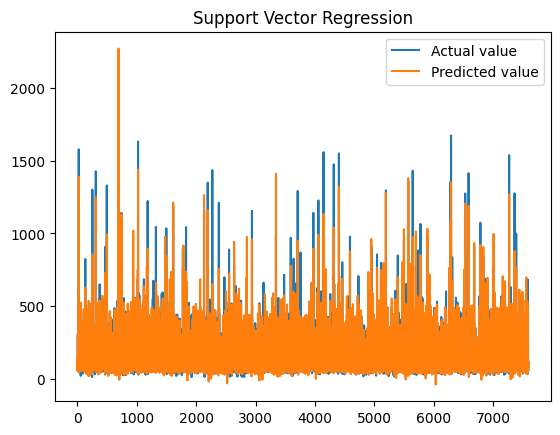

In [66]:
plt.plot(range(len(xtest)), ytest, label="Actual value")
plt.plot(range(len(xtest)), pred2, label="Predicted value")
plt.title("Support Vector Regression")
plt.legend()
plt.show()